In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# unsere Daten
train_data = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')

# Anzeige der Datentypen der Spalten im Trainingsdatensatz
print(train_data.dtypes)

id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object


In [2]:
# Trennen der Merkmale (X) und des Zielwerts (y) im Trainingsdatensatz
X = train_data.drop(['Price', 'id'], axis=1)  
y = train_data['Price']

# Behandlung der fehlenden Werte fur numerische Merkmale
numeric_features = ['Compartments', 'Weight Capacity (kg)']

numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

# Behandlung der fehlenden Werte fur kategoriale Merkmale
categorical_features = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])


encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_categorical_data = encoder.fit_transform(X[categorical_features])

encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
from sklearn.metrics import r2_score

#Aufteilen der Daten in Trainings- und Testsets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training: Linear Regression Modell
model = LinearRegression()
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Berechnung MSE, MAE, R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_2 =r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r_2}")

Mean Squared Error: 1514.8251732942024
Mean Absolute Error: 33.65012634932764
R-squared: 0.0011807714229805644


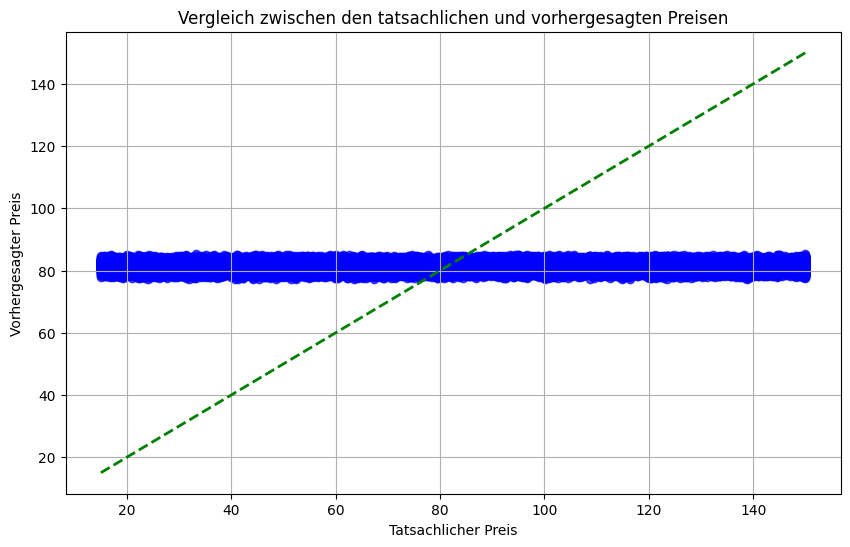

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', lw=2)
plt.title('Vergleich zwischen den tatsachlichen und vorhergesagten Preisen')
plt.xlabel('Tatsachlicher Preis')
plt.ylabel('Vorhergesagter Preis')
plt.grid(True)
plt.show()

In [5]:
X_test_data = test_data.drop(['id'], axis=1)  

X_test_data[numeric_features] = numeric_imputer.transform(X_test_data[numeric_features]) 
X_test_data[categorical_features] = categorical_imputer.transform(X_test_data[categorical_features])  

encoded_test_data = encoder.transform(X_test_data[categorical_features])
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_features))

X_test_data = X_test_data.drop(categorical_features, axis=1)

X_test_data = pd.concat([X_test_data, encoded_test_df], axis=1)


predictions = model.predict(X_test_data)


submission = test_data[['id']].copy()  
submission['Price'] = predictions  


submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!


In [6]:
print(f"Predictions shape: {predictions.shape}")

Predictions shape: (200000,)


In [7]:
print(submission.head())

       id      Price
0  300000  82.054039
1  300001  82.259465
2  300002  81.539759
3  300003  81.655558
4  300004  78.538869


In [8]:
!ls /kaggle/working/

__notebook__.ipynb  submission.csv
